## Arima Models

In [36]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [37]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [38]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [39]:
df.columns = ['Month', 'Milk in Pounds per Cow']

In [40]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [41]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [42]:
df.drop(168,axis=0,inplace=True)

In [43]:
df['Month']= pd.to_datetime(df['Month'])

In [44]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [45]:
df.set_index('Month', inplace=True)

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


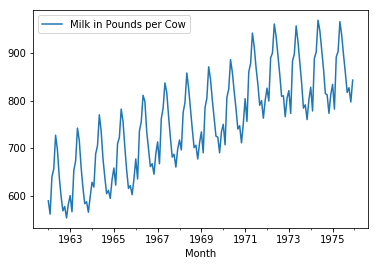

In [47]:
df.plot()

In [53]:
time_series = df['Milk in Pounds per Cow']

In [54]:
type(time_series)

pandas.core.series.Series

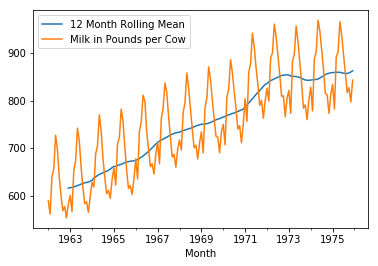

In [59]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.plot()
plt.legend()

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

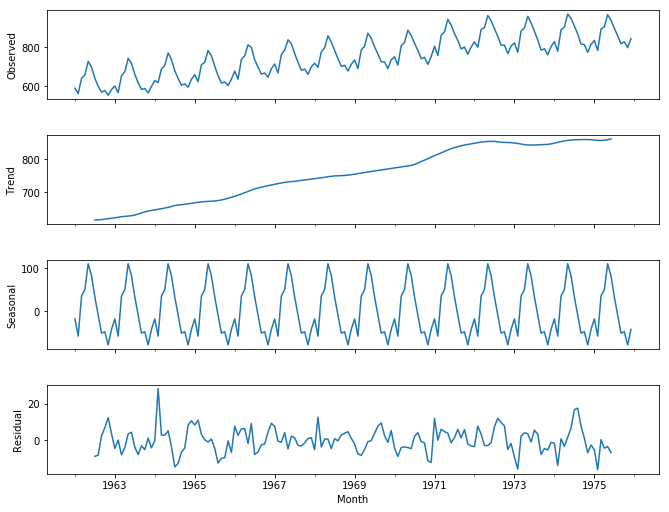

In [69]:
decomp = seasonal_decompose(time_series)
fig = decomp.plot()
fig.set_size_inches(10,8)

In [70]:
from statsmodels.tsa.stattools import adfuller

In [72]:
result = adfuller(df['Milk in Pounds per Cow'])

In [73]:
result

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [74]:
def adf_check(time_series):
    result = adfuller(times_series)
    print('Augmented Dicky-Fuller Test')
    labels = ['ADF Test Statistics', 'p-value', '# of Lags', 'Num of Observations used']